epoch= 1 loss= tensor(0.3752, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(3.8239, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(0.4493, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.4379, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.2908, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.4241, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.3554, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.2687, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.2336, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.2223, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.2109, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.2003, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.1908, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.1823, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.1741, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.1652, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.1547, grad_fn=<MseLossBackward0>)
epoch=

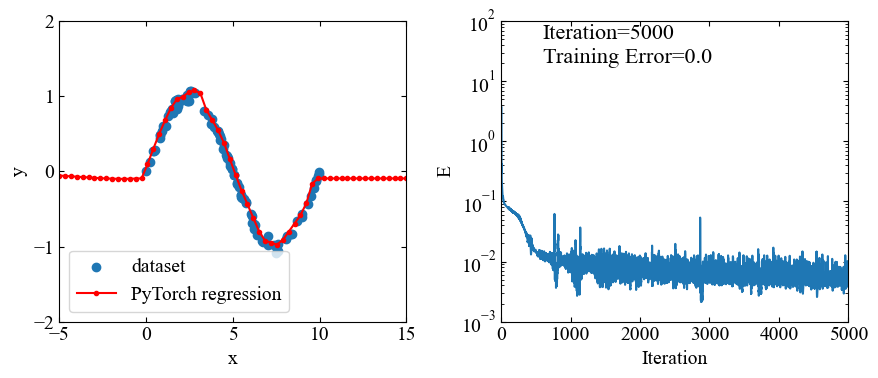

In [36]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred

# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

epoch= 1 loss= tensor(0.9276, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(5.4727, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(1.8996, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.6519, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.6538, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.4629, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.4130, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.3921, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.3809, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.3720, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.3633, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.3606, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.3579, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.3468, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.3408, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.3378, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.3335, grad_fn=<MseLossBackward0>)
epoch=

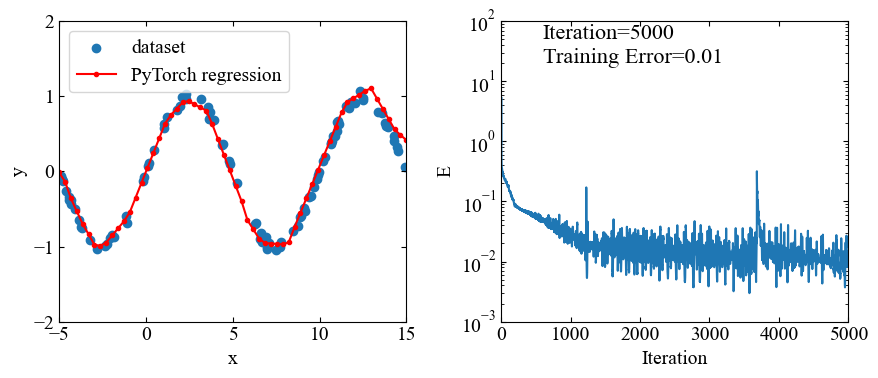

In [37]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred

# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(-5, 15, 100)                                  # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.sin(2 * np.pi * 0.1 * x)  # 正弦波を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

epoch= 1 loss= tensor(25649946., grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(25610884., grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(25517054., grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(25350250., grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(25107748., grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(24793980., grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(24419244., grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(23984802., grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(23511114., grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(22995888., grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(22462156., grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(21904760., grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(21343600., grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(20782970., grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(20230050., grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(19691122., grad_fn=<MseLossBackward0>)
epoch= 17 loss= t

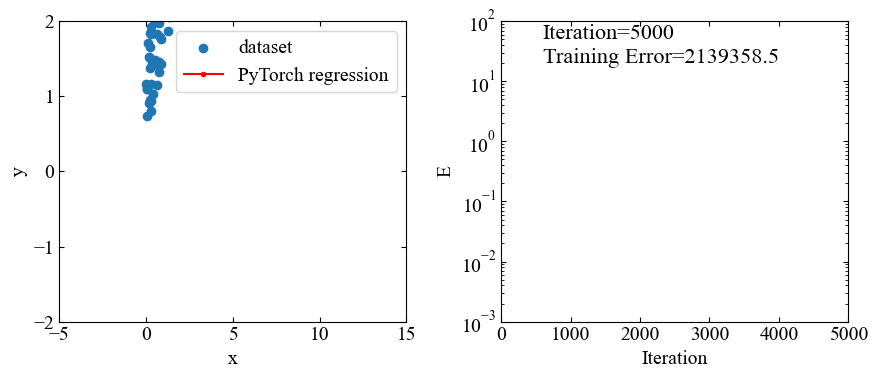

In [38]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred

# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 500)                                   # x軸をランダムで作成
y = np.random.uniform(0.5, 1.5, 500) * np.exp(x)                    # 指数関数を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(500), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

epoch= 1 loss= tensor(0.3911, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(7.3715, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(48.9627, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.1445, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.1175, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.1005, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.0896, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.0835, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.0796, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.0767, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.0745, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.0725, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.0706, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.0688, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.0670, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.0651, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.0632, grad_fn=<MseLossBackward0>)
epoch

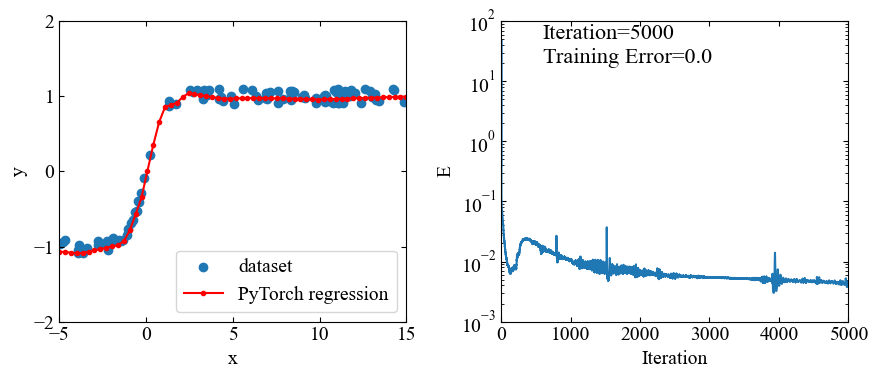

In [39]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred

# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(-5, 15, 100)                                  # x軸をランダムで作成
y = np.random.uniform(0.9, 1.1, 100) * np.tanh(x)                   # tanh関数を作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 60)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(60), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)

In [40]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob

# GIFアニメーションを作成
def create_gif(in_dir, out_filename):
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))  # ファイルパスをソートしてリストする
    imgs = []  # 画像をappendするための空配列を定義

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])  # 画像ファイルを1つずつ開く
        imgs.append(img)  # 画像をappendで配列に格納していく

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=100, loop=0)

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class Regression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 1)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)

        #グラフ描画
        X1 = np.arange(0, 11, 0.5)                                                # x軸を作成
        X2 = np.arange(0, 11, 0.5)                                                # y軸を作成
        X, Y = np.meshgrid(X1, X2)                                                # x軸とy軸からグリッドデータを作成

        X2 = torch.from_numpy(X.ravel().astype(np.float32)).float()  # xをテンソルに変換
        Y2 = torch.from_numpy(Y.ravel().astype(np.float32)).float() # xをテンソルに変換
        Input = torch.stack([torch.ones(len(X.ravel())), X2, Y2], 1)  # xに切片用の定数1配列を結合

        # 50計算毎にプロットを保存
        if (i + 1) % 50 == 0:
            Z = test(model, Input).reshape(X.shape)
            plot_3d(x.T[1], x.T[2], y, X, Y, Z, losses, 'out', i+1)
    return model, losses

def test(model, x):
    y_pred = model(x).data.numpy()  # 予測
    return y_pred

# グラフ描画関数
def plot_3d(x1, x2, z, X, Y, Z, losses, dir, index):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_zlim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 10)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter3D(x1, x2, z, label='dataset')
    ax1.plot_wireframe(X, Y, Z, color='red', label='PyTorch result')
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.scatter(len(losses), losses[len(losses) - 1], color='red')
    ax2.text(600, 0.3, 'Loss=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 0.5, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend(bbox_to_anchor=(0, 1), loc='upper left')
    fig.tight_layout()

    # dirフォルダが無い時に新規作成
    if os.path.exists(dir):
        pass
    else:
        os.mkdir(dir)

    # 画像保存パスを準備
    path = os.path.join(*[dir, str("{:05}".format(index)) + '.png'])

    # 画像を保存する
    plt.savefig(path)

    # plt.show()
    plt.close()


    # -------------------------------------------------------------------

# トレーニングデータ
x1 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだx軸を作成
x2 = np.random.uniform(0, 10, 30)                                     # ノイズを含んだy軸を作成
grid_x, grid_y = np.meshgrid(x1, x2)                                  # Gridデータを作成
z = np.sin(grid_x.ravel()) * np.cos(grid_y.ravel())                   # ノイズを含んだ平面点列データを作成

grid_x = torch.from_numpy(grid_x.ravel().astype(np.float32)).float()  # grid_xをテンソルに変換
grid_y = torch.from_numpy(grid_y.ravel().astype(np.float32)).float()  # grid_yをテンソルに変換
z = torch.from_numpy(z.astype(np.float32)).float()                    # yをテンソルに変換
X = torch.stack([torch.ones(len(grid_x)), grid_x, grid_y], 1)  # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = Regression()

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.RMSprop(net.parameters(), lr=0.01)                # 最適化にRMSpropを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=5000, x=X, y=z)

# GIFアニメーションを作成する関数を実行する
create_gif(in_dir='out', out_filename='pytorch-2d-sincos-regression.gif')

epoch= 1 loss= tensor(0.2245, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(47.9881, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(0.3668, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(0.7150, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(0.3374, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(0.2665, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(0.2279, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(0.2242, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(0.2216, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(0.2198, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(0.2184, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(0.2172, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(0.2163, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(0.2154, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(0.2147, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(0.2141, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(0.2135, grad_fn=<MseLossBackward0>)
epoch

epoch= 1 loss= tensor(338.9090, grad_fn=<MseLossBackward0>)
epoch= 2 loss= tensor(47.3075, grad_fn=<MseLossBackward0>)
epoch= 3 loss= tensor(25.7988, grad_fn=<MseLossBackward0>)
epoch= 4 loss= tensor(24.0341, grad_fn=<MseLossBackward0>)
epoch= 5 loss= tensor(23.7143, grad_fn=<MseLossBackward0>)
epoch= 6 loss= tensor(23.5018, grad_fn=<MseLossBackward0>)
epoch= 7 loss= tensor(23.2987, grad_fn=<MseLossBackward0>)
epoch= 8 loss= tensor(23.0980, grad_fn=<MseLossBackward0>)
epoch= 9 loss= tensor(22.8990, grad_fn=<MseLossBackward0>)
epoch= 10 loss= tensor(22.7018, grad_fn=<MseLossBackward0>)
epoch= 11 loss= tensor(22.5063, grad_fn=<MseLossBackward0>)
epoch= 12 loss= tensor(22.3125, grad_fn=<MseLossBackward0>)
epoch= 13 loss= tensor(22.1204, grad_fn=<MseLossBackward0>)
epoch= 14 loss= tensor(21.9299, grad_fn=<MseLossBackward0>)
epoch= 15 loss= tensor(21.7411, grad_fn=<MseLossBackward0>)
epoch= 16 loss= tensor(21.5540, grad_fn=<MseLossBackward0>)
epoch= 17 loss= tensor(21.3684, grad_fn=<MseLoss

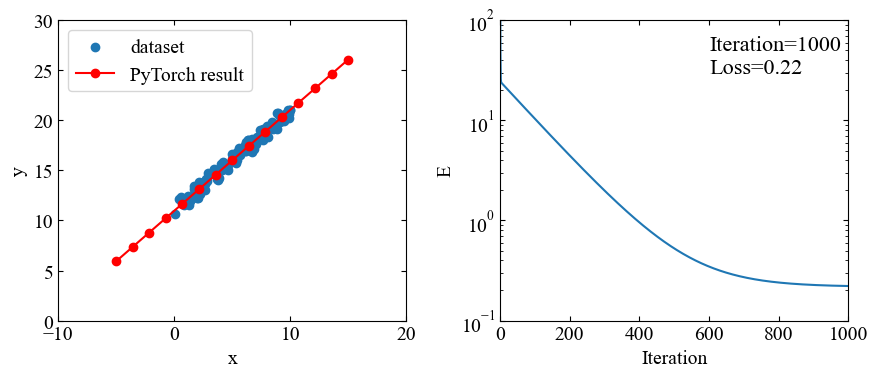

In [42]:
import torch
from torch import nn, optim
import numpy as np
from matplotlib import pyplot as plt

# 線形回帰ネットワークのclassをnn.Moduleの継承で定義
class LinearRegression(nn.Module):
    # コンストラクタ(インスタンス生成時の初期化)
    def __init__(self, in_features, out_features, bias=False):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias=bias)

    # メソッド(ネットワークをシーケンシャルに定義)
    def forward(self, x):
        y = self.linear(x)
        return y

# トレーニング関数
def train(model, optimizer, E, iteration, x, y):
    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                   # 勾配情報を0に初期化
        y_pred = model(x)                       # 予測
        loss = E(y_pred.reshape(y.shape), y)    # 損失を計算(shapeを揃える)
        loss.backward()                         # 勾配の計算
        optimizer.step()                        # 勾配の更新
        losses.append(loss.item())              # 損失値の蓄積
        print('epoch=', i+1, 'loss=', loss)
    return model, losses

# テスト関数
def test(model, x):
    y_pred = model(x).data.numpy().T[0]  # 予測
    return y_pred


# グラフ描画関数
def plot(x, y, x_new, y_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'

    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')

    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')

    # スケール設定
    ax1.set_xlim(-10, 20)
    ax1.set_ylim(0, 30)
    ax2.set_xlim(0, 1000)
    ax2.set_ylim(0.1, 100)
    ax2.set_yscale('log')

    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, y_pred, color='red', label='PyTorch result', marker="o")
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 30, 'Loss=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)

    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

# トレーニングデータ
x = np.random.uniform(0, 10, 100)                                   # x軸をランダムで作成
y = np.random.uniform(0.2, 1.9, 100) + x + 10                       # yを分散した線形データとして作成
x = torch.from_numpy(x.astype(np.float32)).float()                  # xをテンソルに変換
y = torch.from_numpy(y.astype(np.float32)).float()                  # yをテンソルに変換
X = torch.stack([torch.ones(100), x], 1)                            # xに切片用の定数1配列を結合

# テストデータ
x_test = np.linspace(-5, 15, 15)                                    # x軸を作成
x_test = torch.from_numpy(x_test.astype(np.float32)).float()        # xをテンソルに変換
X_test = torch.stack([torch.ones(15), x_test], 1)                   # xに切片用の定数1配列を結合

# ネットワークのインスタンスを生成
net = LinearRegression(in_features=2, out_features=1)

# 最適化アルゴリズムと損失関数を設定
optimizer = optim.SGD(net.parameters(), lr=0.01)                    # 最適化にSGDを設定
E = nn.MSELoss()                                                    # 損失関数にMSEを設定

# トレーニング
net, losses = train(model=net, optimizer=optimizer, E=E, iteration=1000, x=X, y=y)

# テスト
y_pred = test(net, X_test)

# グラフ描画
plot(x, y, X_test.data.numpy().T[1], y_pred, losses)